## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –ø–æ –ê–∫–º–æ–ª–∏–Ω—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [2]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.head(5)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [3]:
df_akmola = df[df['–†–µ–≥–∏–æ–Ω'] == '–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_akmola = df_akmola.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_akmola.head()

–ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01  4455.35     9.8        372560.0   -12.490323
1  2015-02  3654.20     9.8        399442.0   -10.192857
2  2015-03  4287.08     8.3        425605.0    -5.870968
3  2015-04  3923.21     8.8        440023.0     4.490000
4  2015-05  3849.70    42.8        444647.0    14.574194

In [4]:
df_akmola = df_akmola.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_akmola.head()

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01          4455.35     9.8        372560.0   -12.490323
1  2015-02          3654.20     9.8        399442.0   -10.192857
2  2015-03          4287.08     8.3        425605.0    -5.870968
3  2015-04          3923.21     8.8        440023.0     4.490000
4  2015-05          3849.70    42.8        444647.0    14.574194

In [5]:
df_akmola['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_akmola['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')

In [6]:
df_akmola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥           120 non-null    datetime64[ns]
 1   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏           120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [7]:
df_akmola.isna().sum()

–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

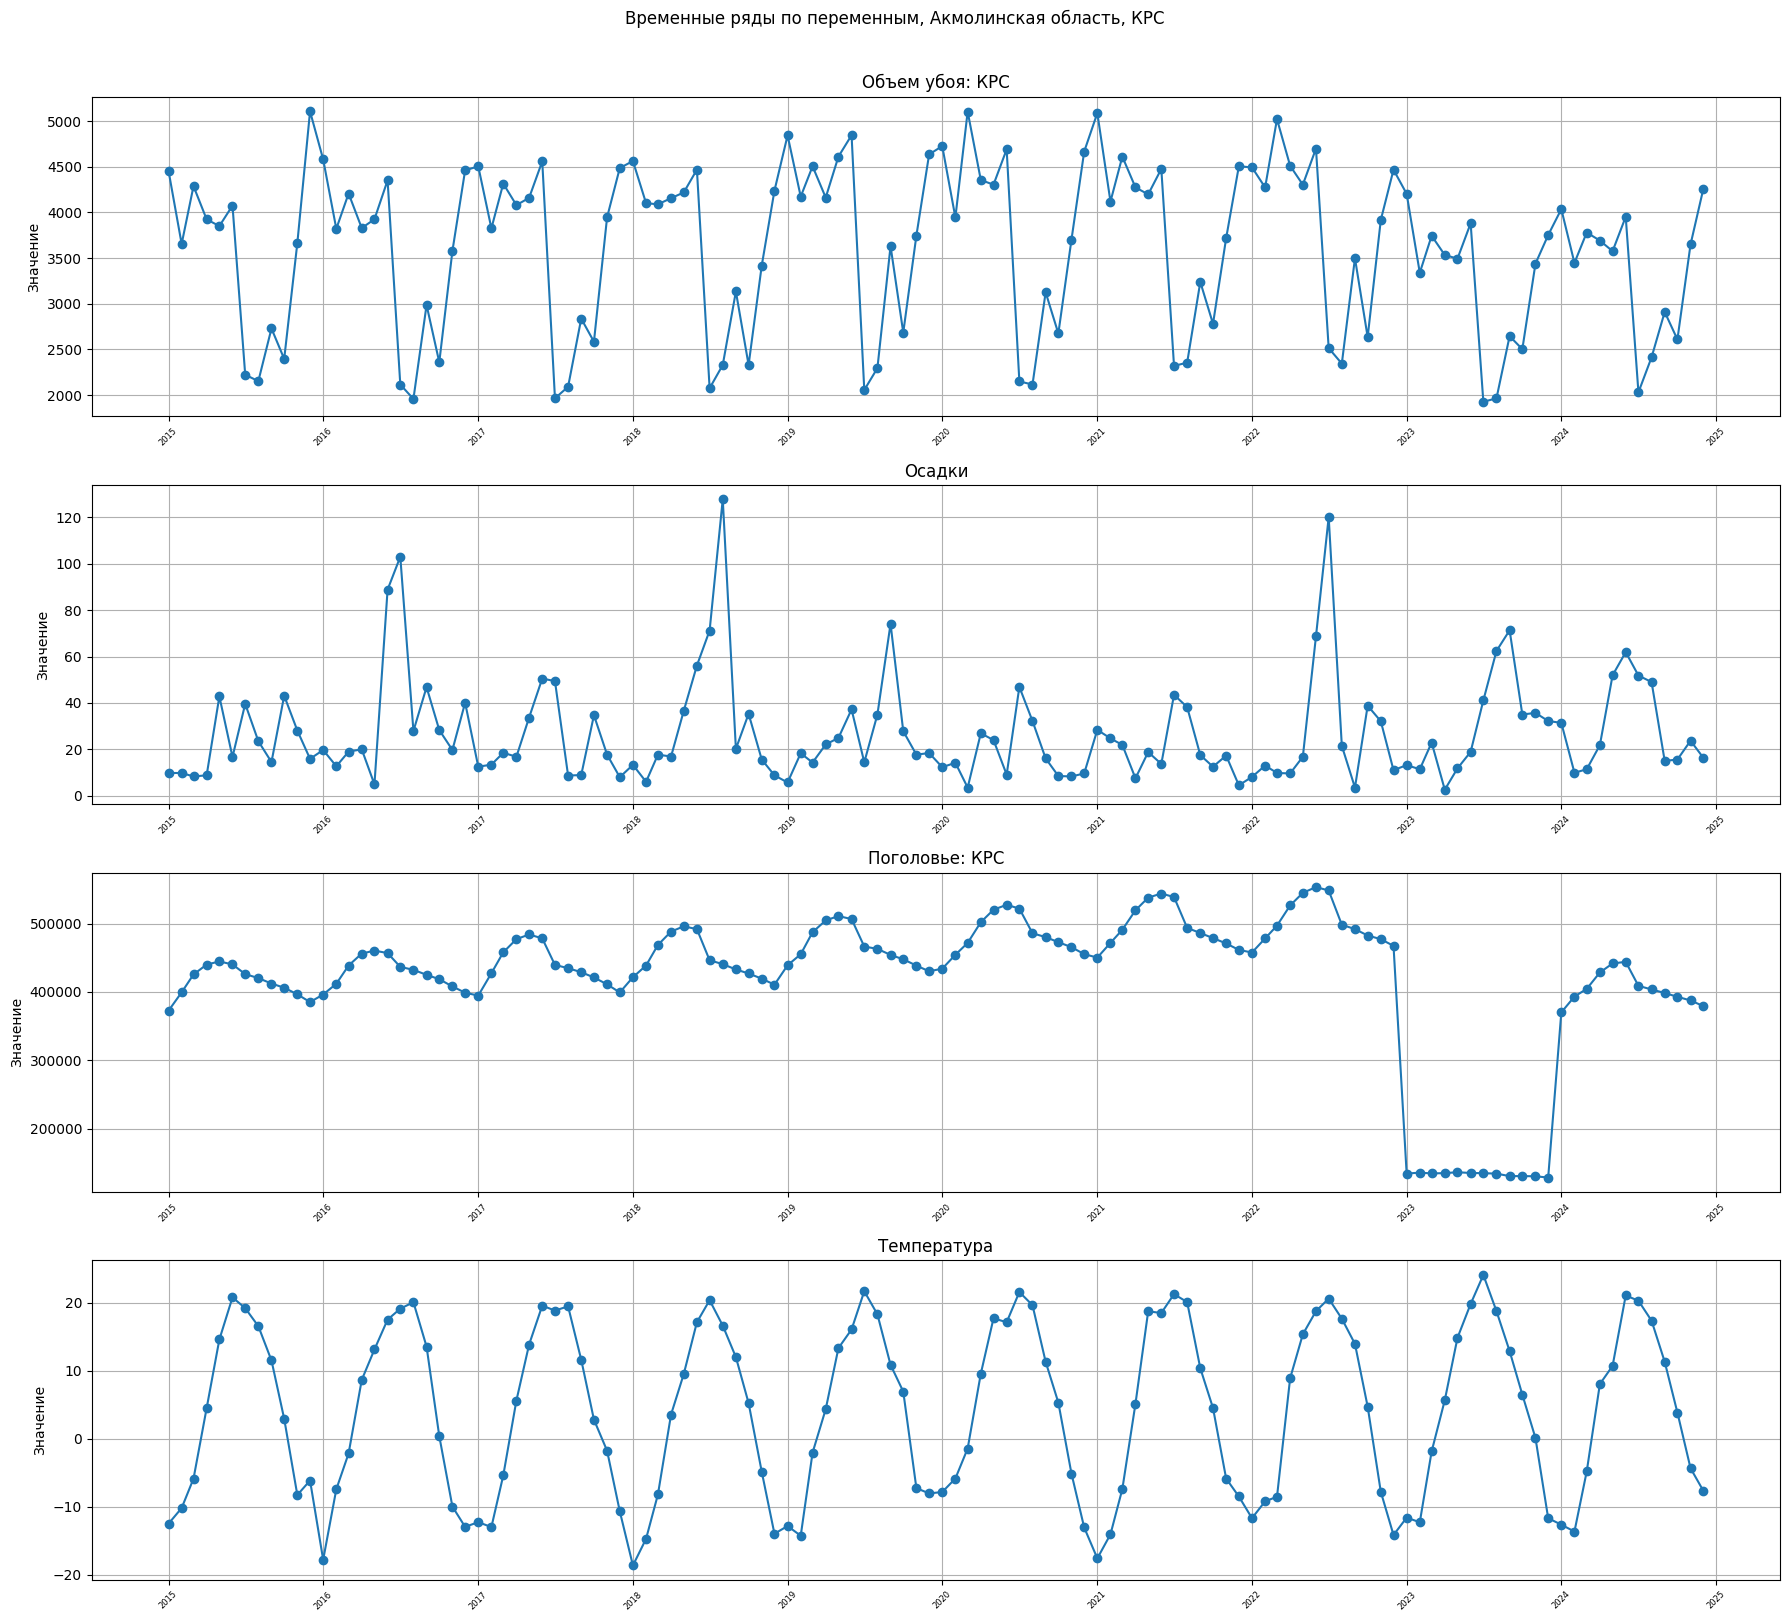

In [8]:
# Plot each variable in its own subplot
value_cols = [col for col in df_akmola.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_akmola["–ü–µ—Ä–∏–æ–¥"], df_akmola[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)
plt.tight_layout()
plt.show()


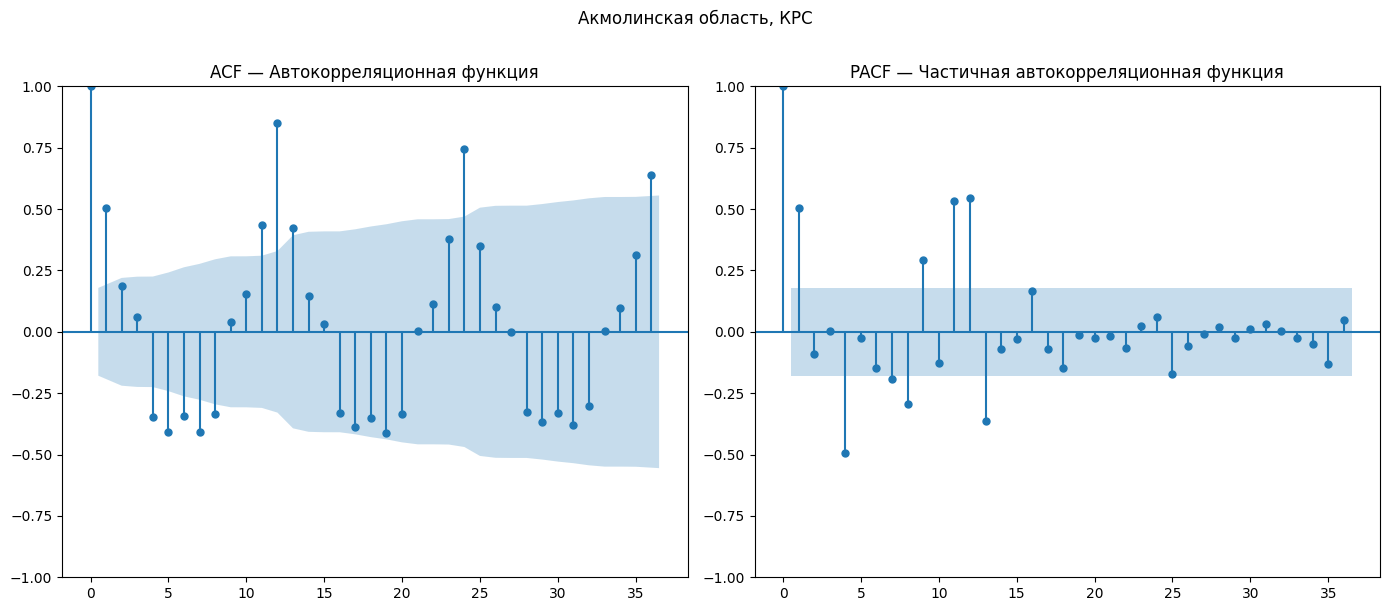

In [9]:
y = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=36, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=36, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫–∏ –Ω–∞ +12, +24 –∏ +36 –º–µ—Å—è—Ü–µ–≤). 

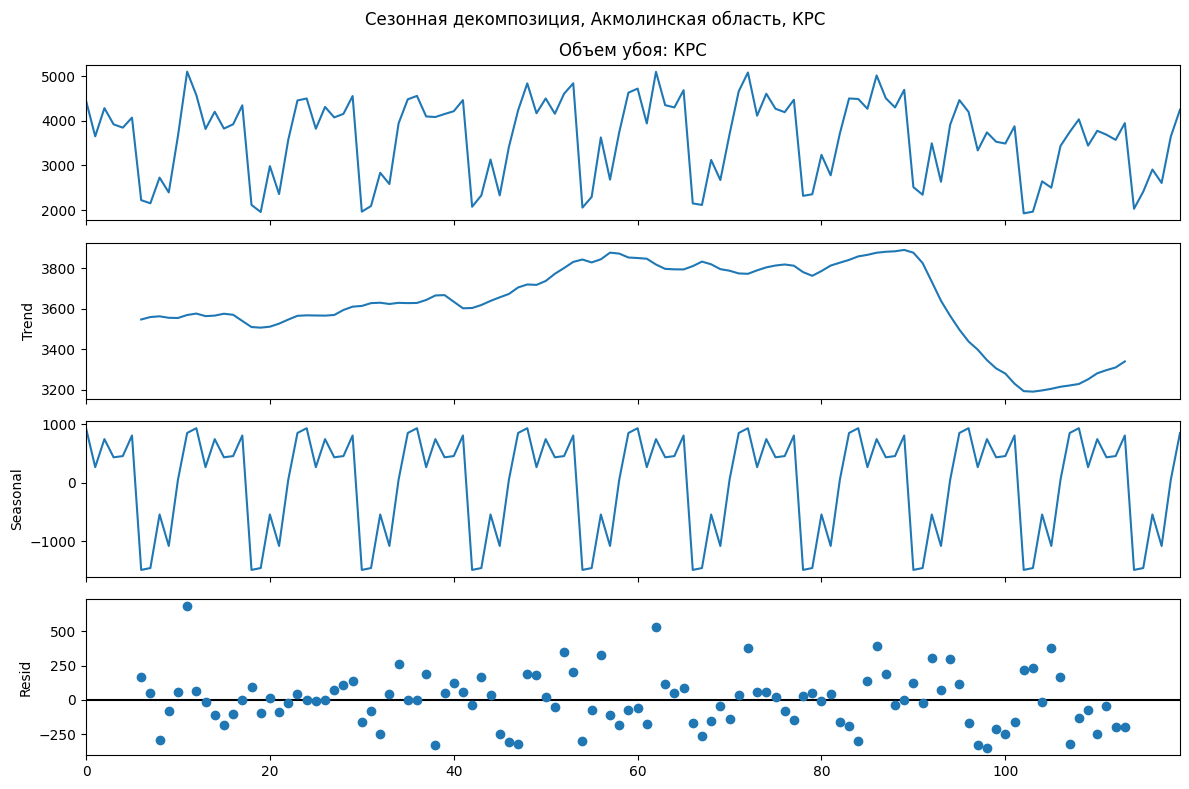

In [10]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
# Run ADF test
result = adfuller(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.2365
p-value: 0.6577
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [12]:
df_akmola

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0   2015-01-01          4455.35     9.8        372560.0   -12.490323
1   2015-02-01          3654.20     9.8        399442.0   -10.192857
2   2015-03-01          4287.08     8.3        425605.0    -5.870968
3   2015-04-01          3923.21     8.8        440023.0     4.490000
4   2015-05-01          3849.70    42.8        444647.0    14.574194
..         ...              ...     ...             ...          ...
115 2024-08-01          2412.70    49.0        403674.0    17.338710
116 2024-09-01          2909.66    15.0        398450.0    11.300000
117 2024-10-01          2608.27    15.6        392916.0     3.832258
118 2024-11-01          3649.19    23.7        387565.0    -4.343333
119 2024-12-01          4253.58    16.4        379385.0    -7.638710

[120 rows x 5 columns]

In [13]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-4 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 5):
    df_akmola[f"–ö–†–°_t-{lag}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)
    df_akmola[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_akmola["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_akmola[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_akmola["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_akmola[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-{lag}"] = df_akmola["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"].shift(lag)

# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ —Å–¥–≤–∏–≥–æ–≤
df_akmola_lagged = df_akmola.dropna().copy()
df_akmola_lagged = df_akmola_lagged[["–ü–µ—Ä–∏–æ–¥",
    "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4",
    "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4",
    "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4",
    "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4"]]

df_akmola_lagged

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
5   2015-06-01          4074.13  3849.70  3923.21  4287.08  3654.20   
6   2015-07-01          2221.96  4074.13  3849.70  3923.21  4287.08   
7   2015-08-01          2151.76  2221.96  4074.13  3849.70  3923.21   
8   2015-09-01          2728.61  2151.76  2221.96  4074.13  3849.70   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
4      14.574194         4.490000        -5.870968       -10.192857   
5      20.763333        14.574194         4.490000        -5.870968   
6      19.180645        20.763333        14.574194         4.490000   
7      16.529032        19.180645        20.763333        14.574194   
8      11.496667        16.529032        19.180645        20.763333   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
5         -10.192857    16.7        42.8         8.8         8.3         9.8   
6          -5.870968    39.6        16.7        42.8         8.8         8.3   
7           4.490000    23.5        39.6        16.7        42.8         8.8   
8          14.574194    14.5        23.5        39.6        16.7        42.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
4          444647.0            440023.0            425605.0   
5          440238.0            444647.0            440023.0   
6          426134.0            440238.0            444647.0   
7          420244.0            426134.0            440238.0   
8          412301.0            420244.0            426134.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
4              399442.0            372560.0  
5              425605.0            399442.0  
6              440023.0            425605.0  
7              444647.0            440023.0  
8              440238.0            444647.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

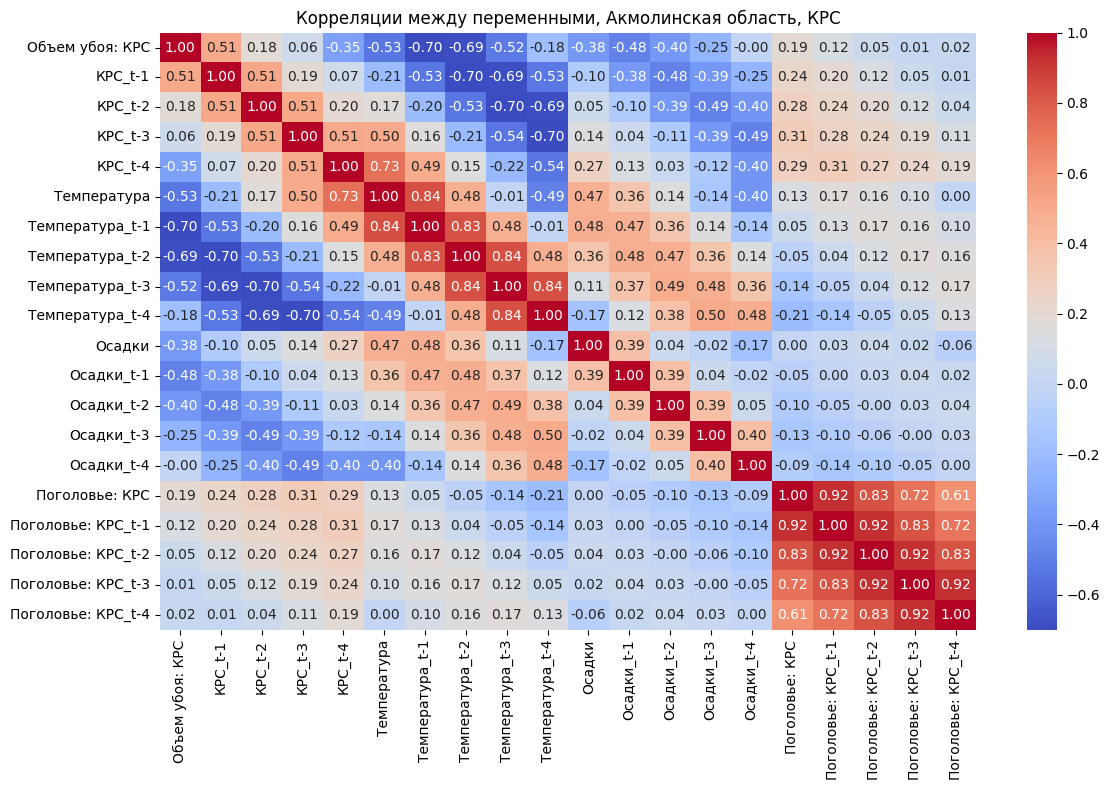

In [14]:
df_corr = df_akmola_lagged[[col for col in df_akmola_lagged.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°")
plt.tight_layout()
plt.show()

* –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.51) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –≤—Å–µ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã: –º–µ–∂–¥—É t0 –∏ t-1, t-1 –∏ t-2 —Ç–∞–∫ –¥–∞–ª–µ–µ. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö: –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ —á–∞—Å—Ç–∏—á–Ω–æ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å–æ—Å–µ–¥–Ω–∏—Ö –º–µ—Å—è—Ü–∞—Ö. –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∞–≥—Ä–∞—Ä–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ, –≥–¥–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∏–º–µ—é—Ç –∏–Ω–µ—Ä—Ü–∏–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR, ARIMA, SARIMA) –º–æ–≥—É—Ç —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è "–ø–æ—Ö–æ–∂–∏" –Ω–∞ –Ω–µ–¥–∞–≤–Ω–∏–µ;
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç, –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –ª–∞–≥–∞ –≤ t-3. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±—ä—ë–º –¥–∞–Ω–Ω—ã—Ö —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ—Å—Ç—å—è–Ω—Å–∫–∏—Ö/—Ñ–µ—Ä–º–µ—Ä—Å–∫–∏—Ö —Ö–æ–∑—è–π—Å—Ç–≤ –∏ —Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–¥–∞—é—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –º–µ—Å—è—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –≤–Ω—É—Ç—Ä–∏–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, –Ω–æ —Å–Ω–∏–∂–∞–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∞–ª–∞–º–∏.
* –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ –æ—Å–∞–¥–∫–∏, –≤ —Ç–æ–º —á–∏—Å–ª–µ –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã, —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è; 
* –ú–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∏ –ø–æ–≥–æ–ª–æ–≤—å—è –≤ —Ä–∞–º–∫–∞—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ–∫—É—â–µ–≥–æ –∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–µ–≤ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.19 –∏ 0.12).

**–ú–û–ñ–ù–û –ï–©–ï –î–û–ë–ê–í–ò–¢–¨ –í–´–í–û–î–´ –ü–†–ò –ù–ï–û–ë–•–û–î–ò–ú–û–°–¢–ò**

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [15]:
df_akmola = df_akmola[["–ü–µ—Ä–∏–æ–¥",
    "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4",
    "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4",
    "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4",
    "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4"]]
df_akmola

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
0   2015-01-01          4455.35      NaN      NaN      NaN      NaN   
1   2015-02-01          3654.20  4455.35      NaN      NaN      NaN   
2   2015-03-01          4287.08  3654.20  4455.35      NaN      NaN   
3   2015-04-01          3923.21  4287.08  3654.20  4455.35      NaN   
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
0     -12.490323              NaN              NaN              NaN   
1     -10.192857       -12.490323              NaN              NaN   
2      -5.870968       -10.192857       -12.490323              NaN   
3       4.490000        -5.870968       -10.192857       -12.490323   
4      14.574194         4.490000        -5.870968       -10.192857   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
0                NaN     9.8         NaN         NaN         NaN         NaN   
1                NaN     9.8         9.8         NaN         NaN         NaN   
2                NaN     8.3         9.8         9.8         NaN         NaN   
3                NaN     8.8         8.3         9.8         9.8         NaN   
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
0          372560.0                 NaN                 NaN   
1          399442.0            372560.0                 NaN   
2          425605.0            399442.0            372560.0   
3          440023.0            425605.0            399442.0   
4          444647.0            440023.0            425605.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3              372560.0                 NaN  
4              399442.0            372560.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

In [16]:
df_akmola_lagged

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
5   2015-06-01          4074.13  3849.70  3923.21  4287.08  3654.20   
6   2015-07-01          2221.96  4074.13  3849.70  3923.21  4287.08   
7   2015-08-01          2151.76  2221.96  4074.13  3849.70  3923.21   
8   2015-09-01          2728.61  2151.76  2221.96  4074.13  3849.70   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
4      14.574194         4.490000        -5.870968       -10.192857   
5      20.763333        14.574194         4.490000        -5.870968   
6      19.180645        20.763333        14.574194         4.490000   
7      16.529032        19.180645        20.763333        14.574194   
8      11.496667        16.529032        19.180645        20.763333   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
5         -10.192857    16.7        42.8         8.8         8.3         9.8   
6          -5.870968    39.6        16.7        42.8         8.8         8.3   
7           4.490000    23.5        39.6        16.7        42.8         8.8   
8          14.574194    14.5        23.5        39.6        16.7        42.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
4          444647.0            440023.0            425605.0   
5          440238.0            444647.0            440023.0   
6          426134.0            440238.0            444647.0   
7          420244.0            426134.0            440238.0   
8          412301.0            420244.0            426134.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
4              399442.0            372560.0  
5              425605.0            399442.0  
6              440023.0            425605.0  
7              444647.0            440023.0  
8              440238.0            444647.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

In [17]:
df_vif = df_akmola_lagged[[col for col in df_akmola_lagged.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]]

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

Variable         VIF
0                const  196.640560
1              –ö–†–°_t-1    3.000134
2              –ö–†–°_t-2    2.792945
3              –ö–†–°_t-3    2.834054
4              –ö–†–°_t-4    3.313961
5          –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   22.493800
6      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1   20.820626
7      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2   23.347806
8      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3   21.580502
9      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4   20.051279
10              –û—Å–∞–¥–∫–∏    1.635704
11          –û—Å–∞–¥–∫–∏_t-1    1.698896
12          –û—Å–∞–¥–∫–∏_t-2    1.738220
13          –û—Å–∞–¥–∫–∏_t-3    1.706987
14          –û—Å–∞–¥–∫–∏_t-4    1.751920
15      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°    8.229444
16  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1   16.060417
17  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2   15.783149
18  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3   15.291030
19  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4    8.296100

In [18]:
def forward_selection(data, target, candidate_features, criterion="adj_r2"):
    remaining = list(candidate_features)
    selected = []
    best_score = -float("inf")
    best_model = None

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            features = selected + [candidate]
            X = sm.add_constant(data[features])
            y = data[target]
            model = sm.OLS(y, X).fit()

            if criterion == "adj_r2":
                score = model.rsquared_adj
            elif criterion == "aic":
                score = -model.aic  # negative for maximizing
            else:
                raise ValueError("criterion must be 'adj_r2' or 'aic'")

            scores_with_candidates.append((score, candidate, model))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate, model = scores_with_candidates[0]

        if best_new_score > best_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            best_score = best_new_score
            best_model = model
            print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
        else:
            print("‚õî No improvement. Stopping.")
            break

    return selected, best_model


In [19]:
# Define target and candidate predictors
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
candidate_features = ['–û—Å–∞–¥–∫–∏', '–û—Å–∞–¥–∫–∏_t-3', '–û—Å–∞–¥–∫–∏_t-2', '–û—Å–∞–¥–∫–∏_t-1',
    '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1',
    '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1',
    '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2', '–ö–†–°_t-1']

# Drop rows with missing values
df_mlr = df_akmola[candidate_features + [target]].dropna()

# Run forward selection
selected_features, final_model = forward_selection(df_mlr, target, candidate_features, criterion="adj_r2")

# Show final summary

print(selected_features)
print("\nüßæ Final Model Summary:")
print(final_model.summary())



‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1, ADJ_R2: 0.4866
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°, ADJ_R2: 0.5341
‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3, ADJ_R2: 0.5612
‚úÖ Added: –ö–†–°_t-4, ADJ_R2: 0.6076
‚úÖ Added: –ö–†–°_t-2, ADJ_R2: 0.6682
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-1, ADJ_R2: 0.6729
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-3, ADJ_R2: 0.6772
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1, ADJ_R2: 0.6804
‚õî No improvement. Stopping.
['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–ö–†–°_t-4', '–ö–†–°_t-2', '–û—Å–∞–¥–∫–∏_t-1', '–û—Å–∞–¥–∫–∏_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1']

üßæ Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:        –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     31.61
Date:                Tue, 22 Apr 2025 

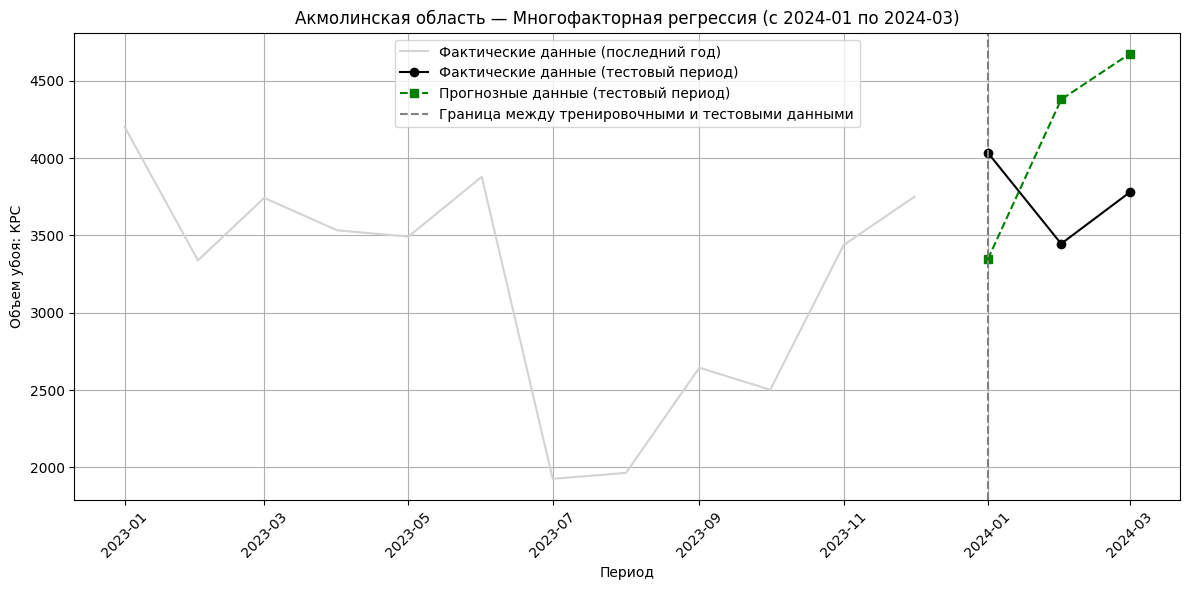

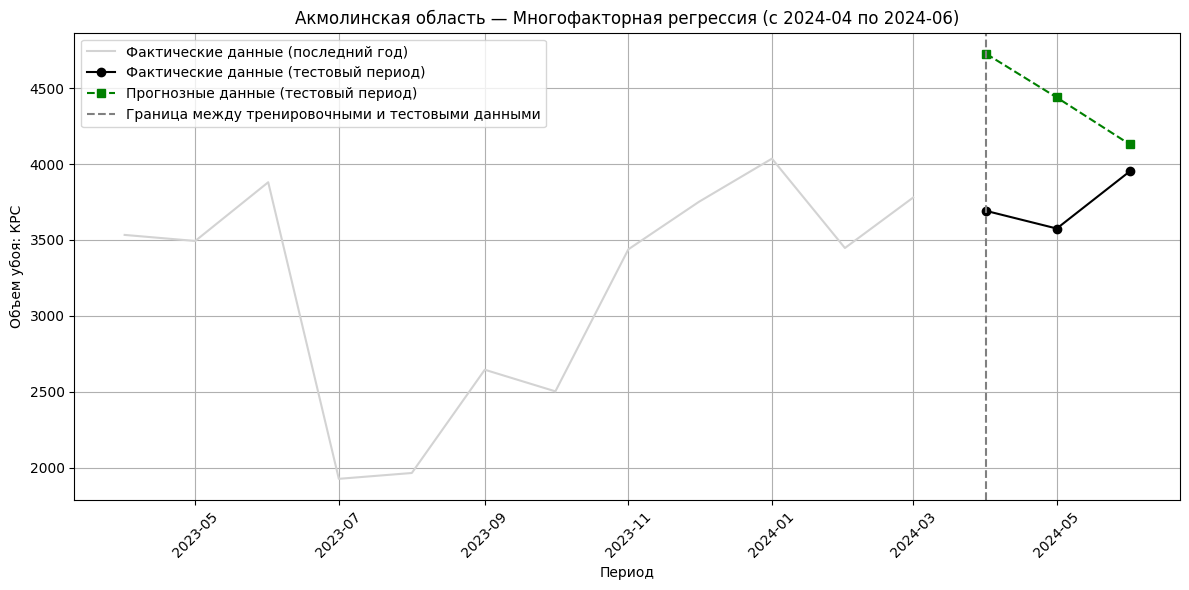

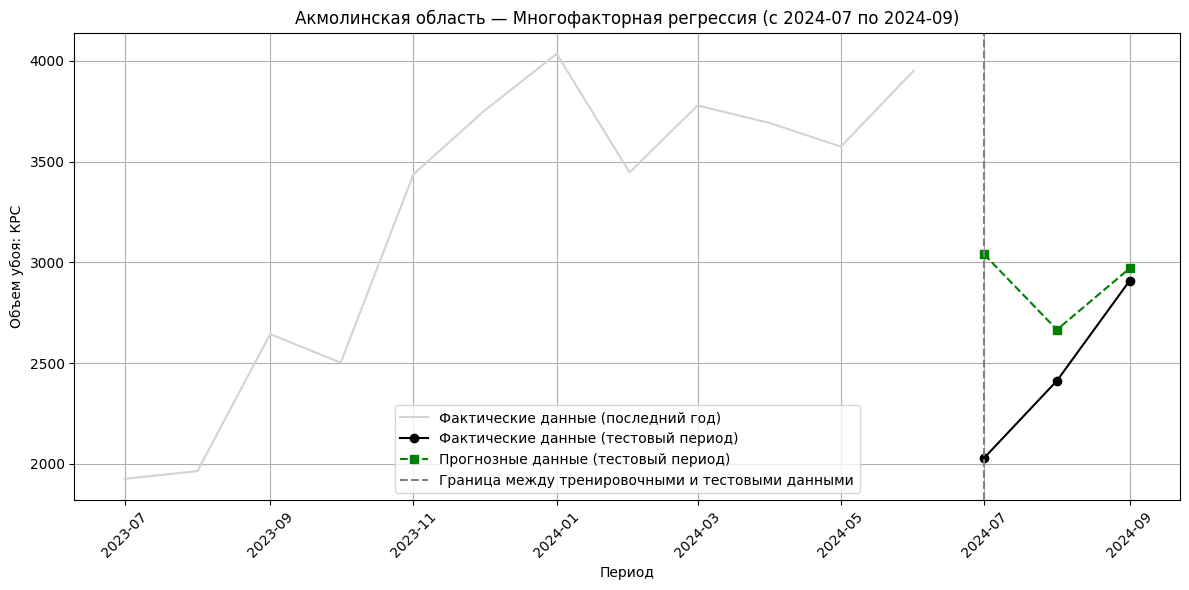

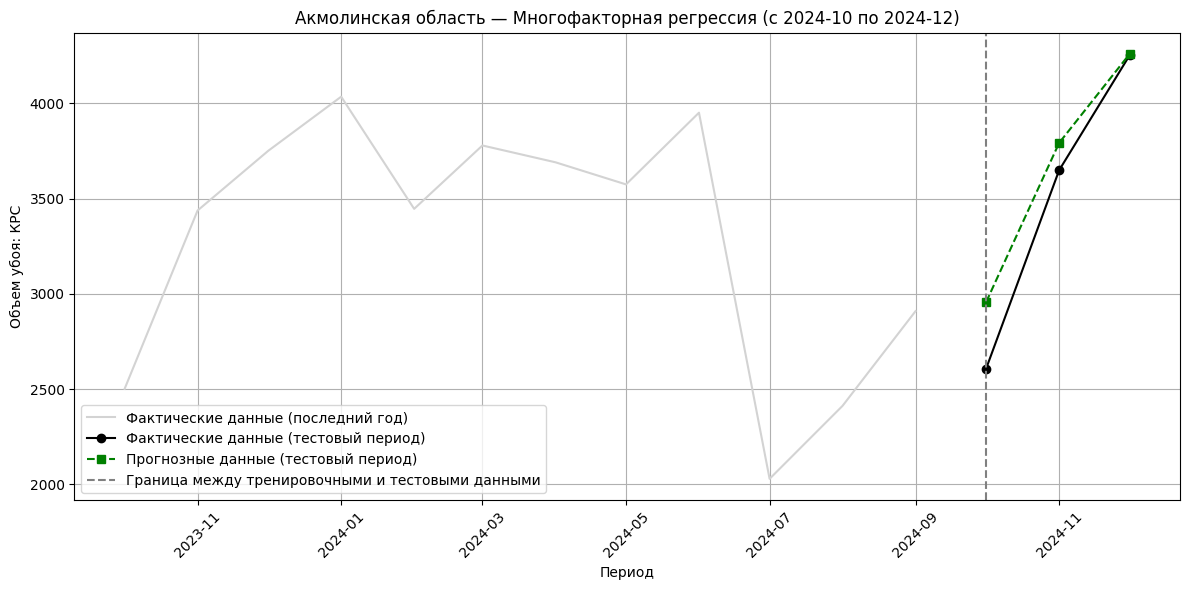

In [20]:
# Ensure your dataframe is sorted by time
df = df_akmola.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()

# # Selected features
# selected_features = [
#     '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–ö–†–°_t-4', '–ö–†–°_t-2', '–û—Å–∞–¥–∫–∏_t-1', '–û—Å–∞–¥–∫–∏_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1'
# ]

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    # Drop NAs and align predictors
    X_train = sm.add_constant(train_df[selected_features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[selected_features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    # print(y_test, '\n', y_pred, '\n', y_test-y_pred)

    r2 = r2_score(y_test, y_pred)
    # print("Zero values in y_test:", (y_test == 0).sum())


    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [21]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-01 to 2024-03  846.209542  839.340520  22.618331
1  2024-04 to 2024-06  784.990055  692.244902  18.902098
2  2024-07 to 2024-09  602.449671  441.626082  20.795883
3  2024-10 to 2024-12  217.971058  166.451109   5.825390
4             Average  612.905082  534.915653  17.035426


In [22]:
df_akmola

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
0   2015-01-01          4455.35      NaN      NaN      NaN      NaN   
1   2015-02-01          3654.20  4455.35      NaN      NaN      NaN   
2   2015-03-01          4287.08  3654.20  4455.35      NaN      NaN   
3   2015-04-01          3923.21  4287.08  3654.20  4455.35      NaN   
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
0     -12.490323              NaN              NaN              NaN   
1     -10.192857       -12.490323              NaN              NaN   
2      -5.870968       -10.192857       -12.490323              NaN   
3       4.490000        -5.870968       -10.192857       -12.490323   
4      14.574194         4.490000        -5.870968       -10.192857   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
0                NaN     9.8         NaN         NaN         NaN         NaN   
1                NaN     9.8         9.8         NaN         NaN         NaN   
2                NaN     8.3         9.8         9.8         NaN         NaN   
3                NaN     8.8         8.3         9.8         9.8         NaN   
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
0          372560.0                 NaN                 NaN   
1          399442.0            372560.0                 NaN   
2          425605.0            399442.0            372560.0   
3          440023.0            425605.0            399442.0   
4          444647.0            440023.0            425605.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3              372560.0                 NaN  
4              399442.0            372560.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

#### ARIMA/SARIMA/SARIMAX

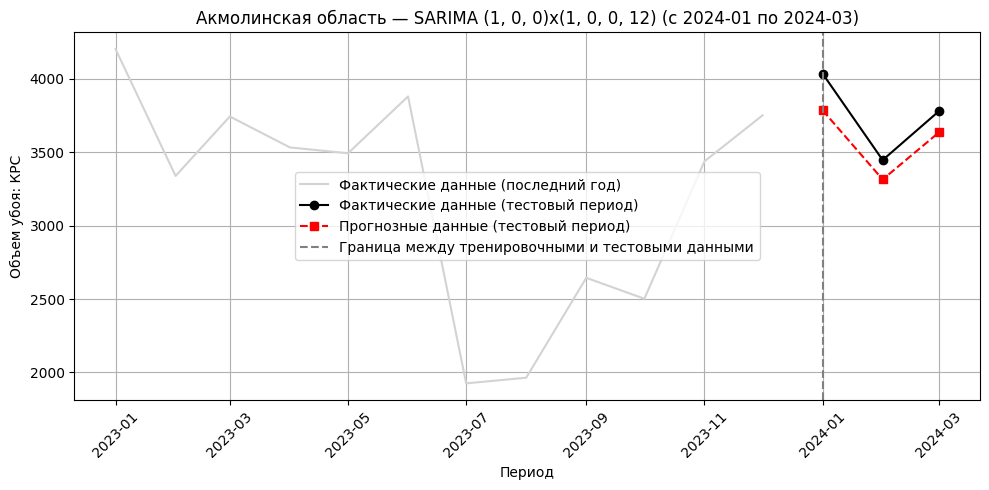

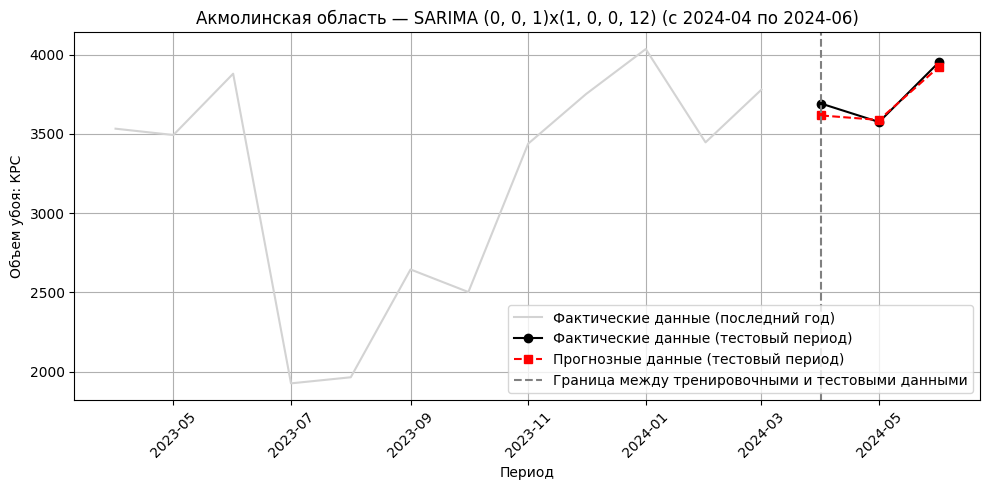

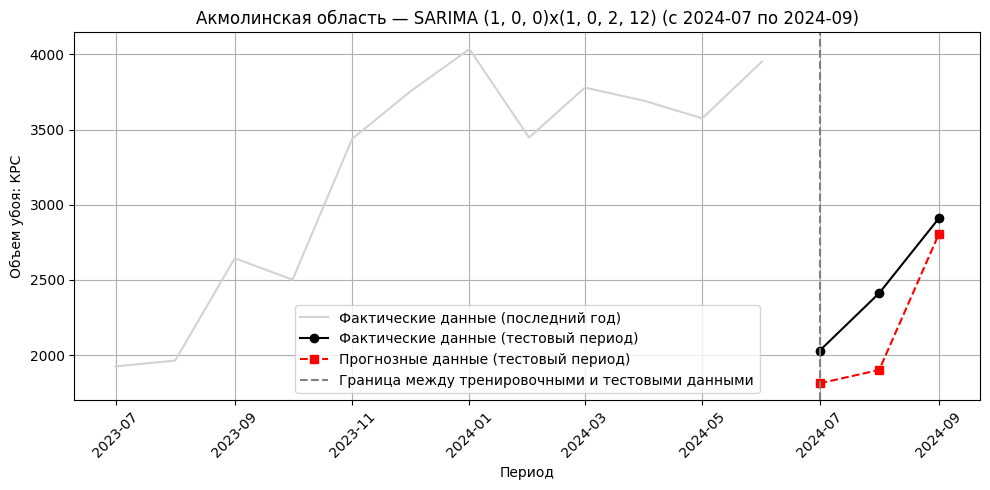

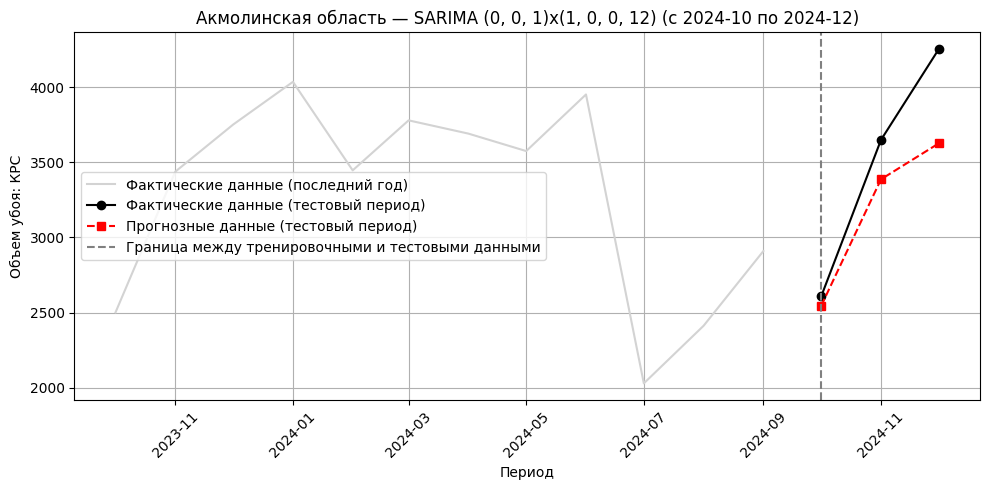

In [23]:
df = df_akmola.sort_values("–ü–µ—Ä–∏–æ–¥").copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)
        # forecast = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
        # print(y_test, '\n', forecast, '\n', y_test-forecast)
        # print("Are indices equal?", y_test.index.equals(forecast.index))



        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [24]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period        RMSE         MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  183.269260  175.509779   4.616666    (1, 0, 0)   
1  2024-04 to 2024-06   46.924346   38.944970   1.041897    (0, 0, 1)   
2  2024-07 to 2024-09  325.969456  277.282038  11.811754    (1, 0, 0)   
3  2024-10 to 2024-12  394.156256  317.396610   8.112661    (0, 0, 1)   
4             Average  237.579830  202.283349   6.395744          NaN   

  Seasonal order  
0  (1, 0, 0, 12)  
1  (1, 0, 0, 12)  
2  (1, 0, 2, 12)  
3  (1, 0, 0, 12)  
4            NaN  


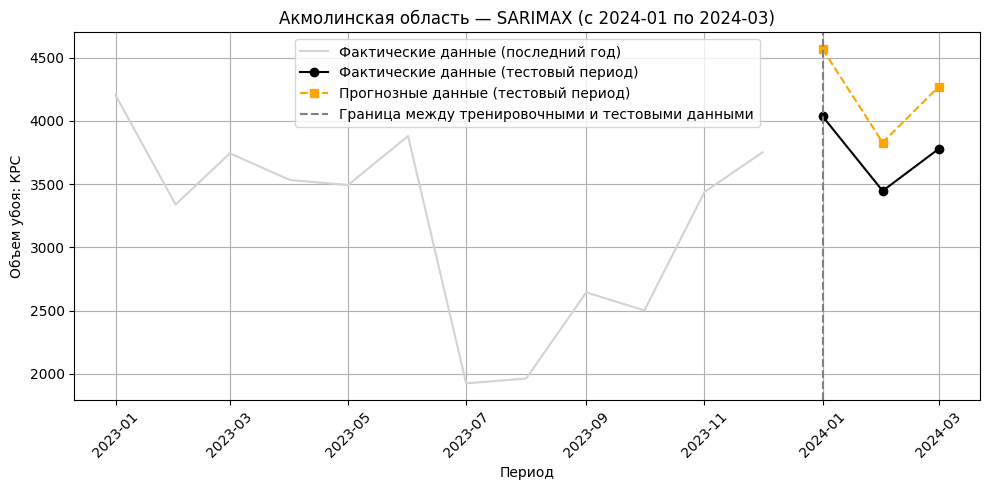

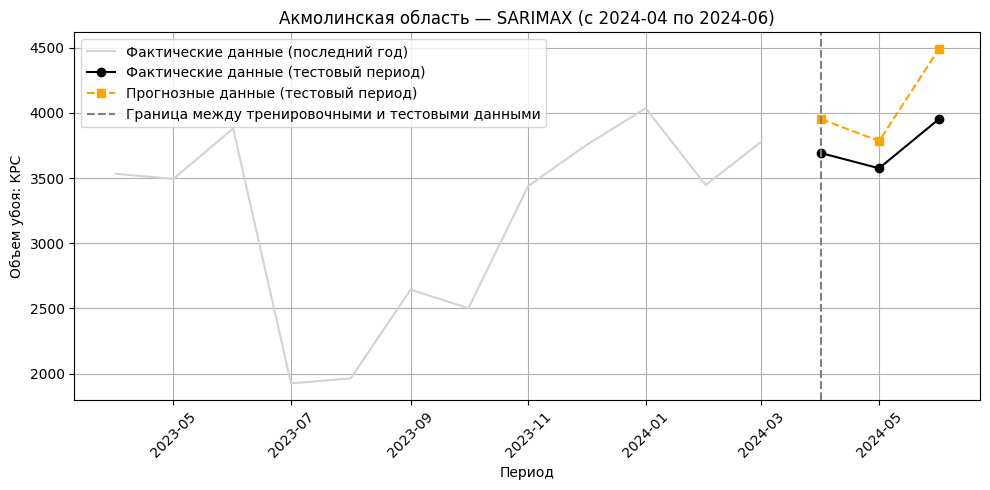

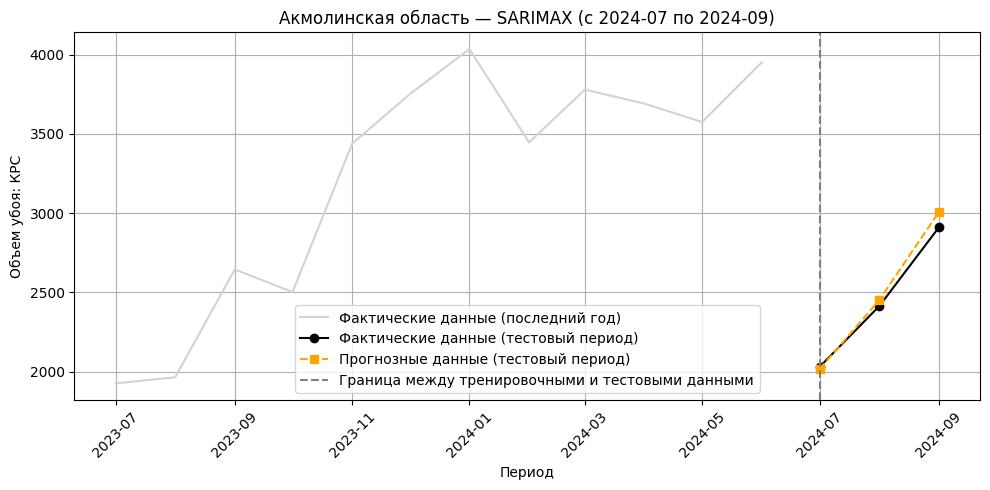

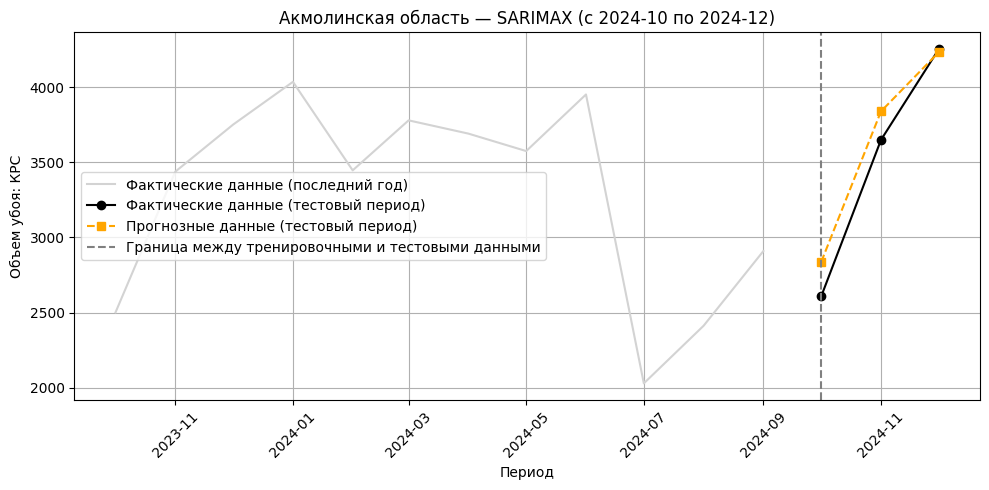

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define your exogenous variables
exog_vars = ['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°']

df = df_akmola.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[exog_vars].reset_index(drop=True)
    exog_test = test_df[exog_vars].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 0, 1),
            seasonal_order=(1, 0, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=3, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [26]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)



          Test period        RMSE         MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  472.796123  468.548312  12.425620            0   
1  2024-04 to 2024-06  365.173493  335.363988   8.827223            0   
2  2024-07 to 2024-09   60.776988   49.903295   1.877417            0   
3  2024-10 to 2024-12  172.142168  146.420591   4.820680            0   
4             Average  267.722193  250.059046   6.987735                

  Seasonal order  
0             12  
1             12  
2             12  
3             12  
4                 


#### Prophet

11:24:17 - cmdstanpy - INFO - Chain [1] start processing
11:24:17 - cmdstanpy - INFO - Chain [1] done processing


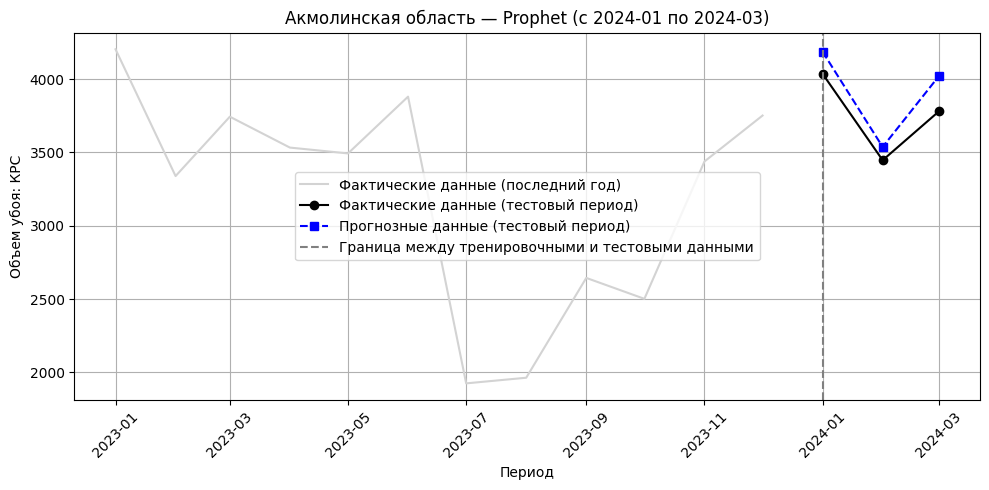

11:24:18 - cmdstanpy - INFO - Chain [1] start processing
11:24:18 - cmdstanpy - INFO - Chain [1] done processing


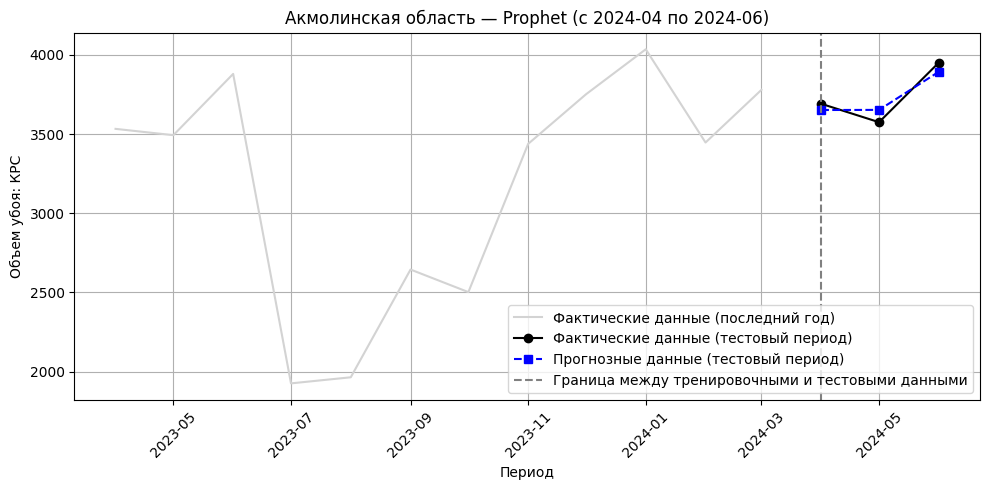

11:24:18 - cmdstanpy - INFO - Chain [1] start processing
11:24:18 - cmdstanpy - INFO - Chain [1] done processing


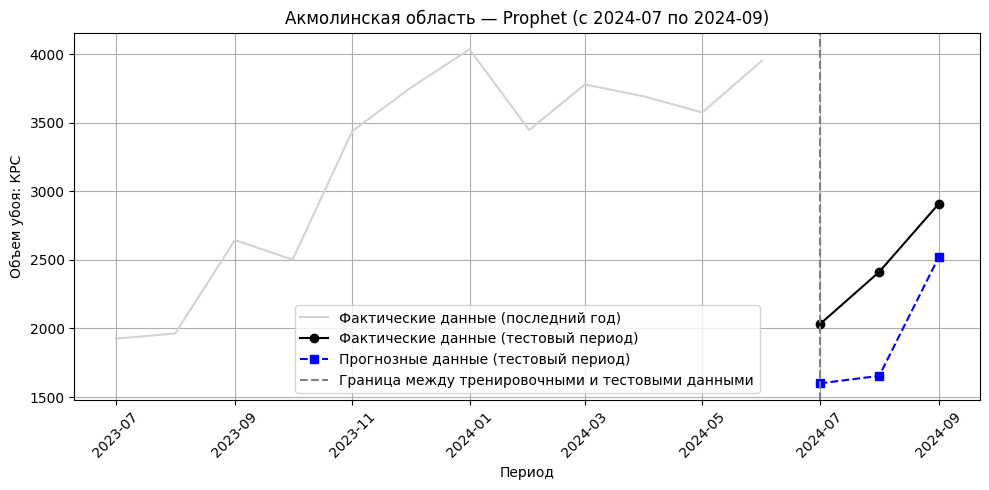

11:24:19 - cmdstanpy - INFO - Chain [1] start processing
11:24:19 - cmdstanpy - INFO - Chain [1] done processing


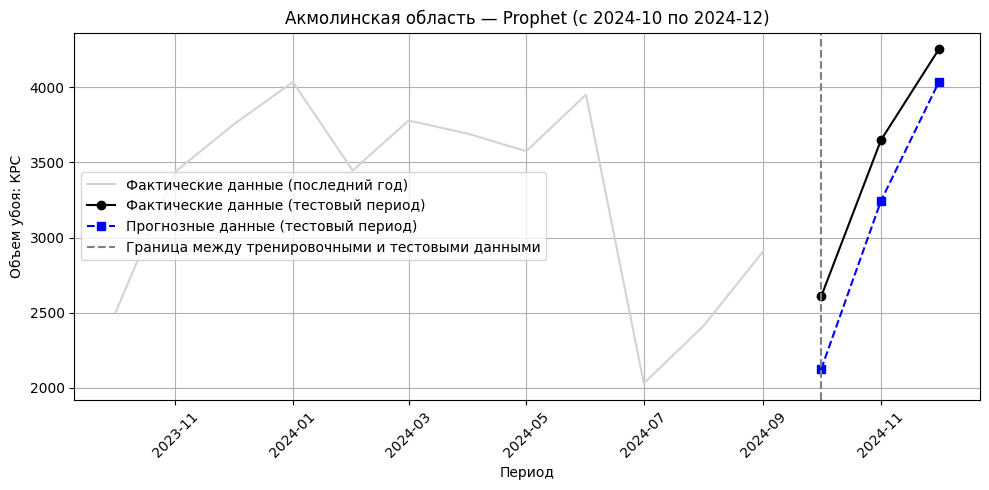

In [27]:
# Prepare Data
df = df_akmola.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# Define 4 test periods
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Train/test split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Initialize Prophet
    model = Prophet()

    # Optional: add regressors
    # model.add_regressor("–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞")
    # model.add_regressor("–û—Å–∞–¥–∫–∏")
    # model.add_regressor("–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°")
    # prophet_train["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"] = train_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].values
    # prophet_test["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"] = test_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].values

    # Fit
    model.fit(prophet_train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=3, freq="M")
    forecast = model.predict(future)
# forecast
# prophet_test

    # Extract forecast for test period only
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [28]:
results_df = pd.DataFrame(results)
avg = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg])], ignore_index=True)
print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-01 to 2024-03  171.715022  160.312432   4.235089
1  2024-04 to 2024-06   60.394655   58.312650   1.568201
2  2024-07 to 2024-09  550.506486  525.013161  21.966202
3  2024-10 to 2024-12  385.444993  369.042283  11.592784
4             Average  292.015289  278.170131   9.840569


strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation